In [36]:
# we have to install the development version for the time being
#!pip uninstall eodal -y
#!pip install git+https://github.com/lukasValentin/eodal@landsat-dev

#!pip install --upgrade git+https://github.com/EOA-team/eodal
#!pip install --upgrade planetary-computer

# Print EOdal version
#import eodal
#print("Version of EOdal: " + eodal.__version__)

In [37]:
# Import general libraries
from pathlib import Path
from matplotlib import pyplot as plt

# Import EOdal libraries
from eodal.core.raster import RasterCollection

In [38]:
#year to plot
year = 2021

#read tif from disk:
fpath_raster = Path(f'S:\MSc_23_TimckeFinn\data\EOdal\landsat_median_composite_{year}_smallAOI_si_cluster.tif')

# initialize a RasterCollection from the .tif file
composite = RasterCollection.from_multi_band_raster(fpath_raster=fpath_raster)
"""                                                     band_names_dst= ['blue_median','green_median','red_median','nir08_median','swir16_median','swir22_median'],
                                                    band_aliases = ["blue", "green", "red", "nir_1", "swir_1","swir_2"])

# calculate some SI
composite.calc_si('NDVI', inplace = True)
composite.calc_si('NDWI', inplace = True)
composite.calc_si('EVI', inplace = True)
composite.calc_si('CI_GREEN', inplace = True)
composite.calc_si('MSAVI', inplace = True)
composite.calc_si('BSI', inplace = True) """

# print band summaries
composite.band_summaries()

,min,mean,std,max,count,geometry,band_name
0,0.077155,0.081507,0.002161,0.110410,19604.0,"POLYGON ((873345.000 55905.000, 873345.000 593...",blue_median
1,0.083210,0.090886,0.004251,0.135910,19604.0,"POLYGON ((873345.000 55905.000, 873345.000 593...",green_median
2,0.079020,0.085550,0.004297,0.156500,19604.0,"POLYGON ((873345.000 55905.000, 873345.000 593...",red_median
3,0.087570,0.184072,0.022578,0.248670,19604.0,"POLYGON ((873345.000 55905.000, 873345.000 593...",nir08_median
4,0.078815,0.126920,0.014209,0.242330,19604.0,"POLYGON ((873345.000 55905.000, 873345.000 593...",swir16_median
5,0.076170,0.098142,0.008388,0.179640,19604.0,"POLYGON ((873345.000 55905.000, 873345.000 593...",swir22_median
6,0.047778,0.360511,0.062971,0.494187,19604.0,"POLYGON ((873345.000 55905.000, 873345.000 593...",NDVI
7,-0.455743,-0.334119,0.060715,-0.021696,19604.0,"POLYGON ((873345.000 55905.000, 873345.000 593...",NDWI
8,0.020682,0.225766,0.046593,0.359439,19604.0,"POLYGON ((873345.000 55905.000, 873345.000 593...",EVI
9,0.044355,1.023185,0.218864,1.674734,19604.0,"POLYGON ((873345.000 55905.000, 873345.000 593...",CI_GREEN


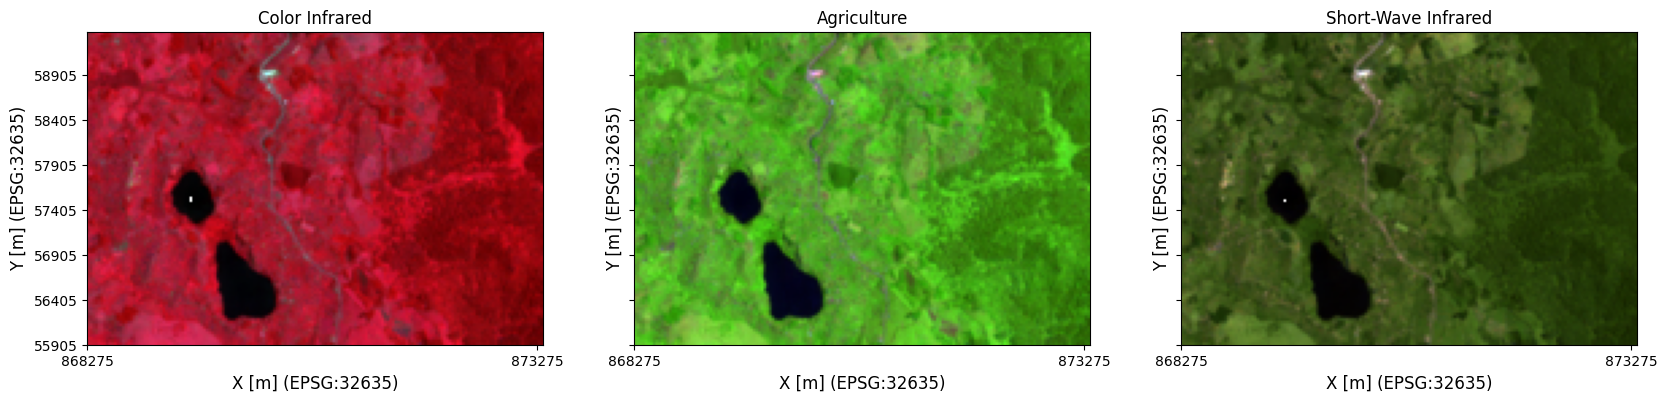

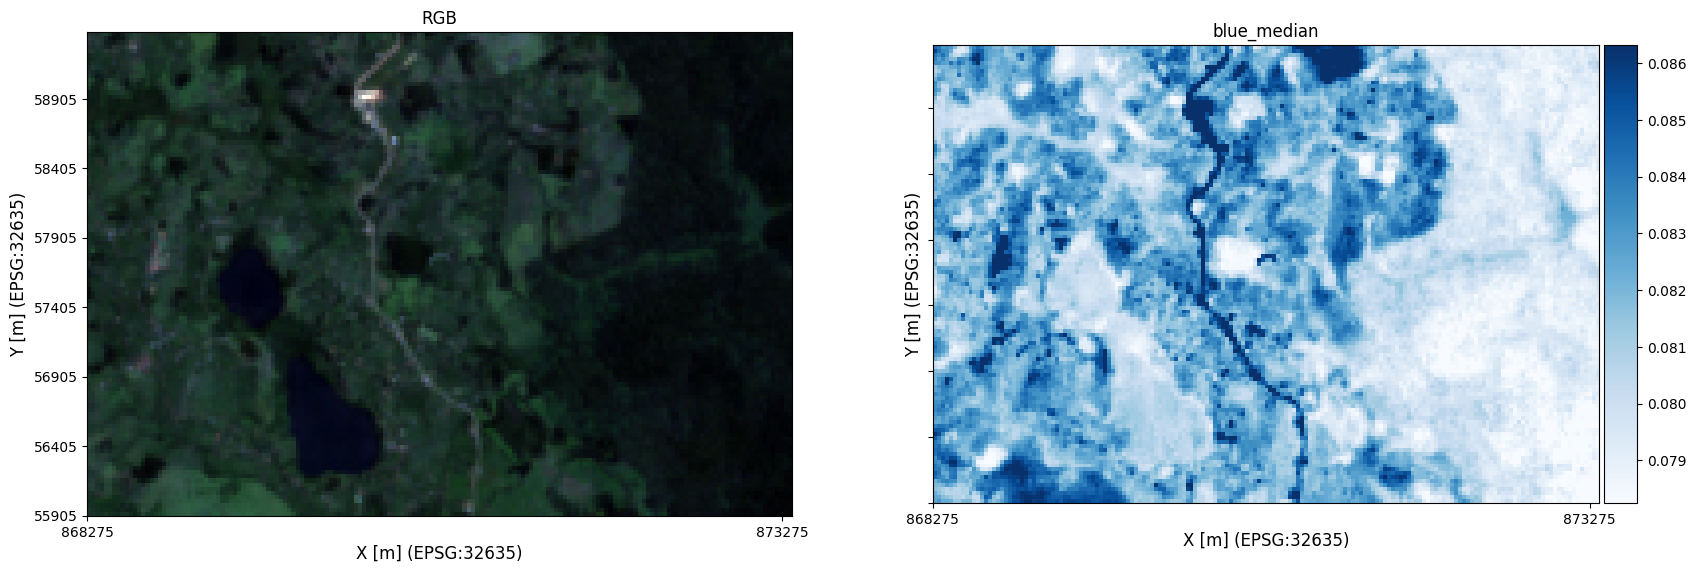

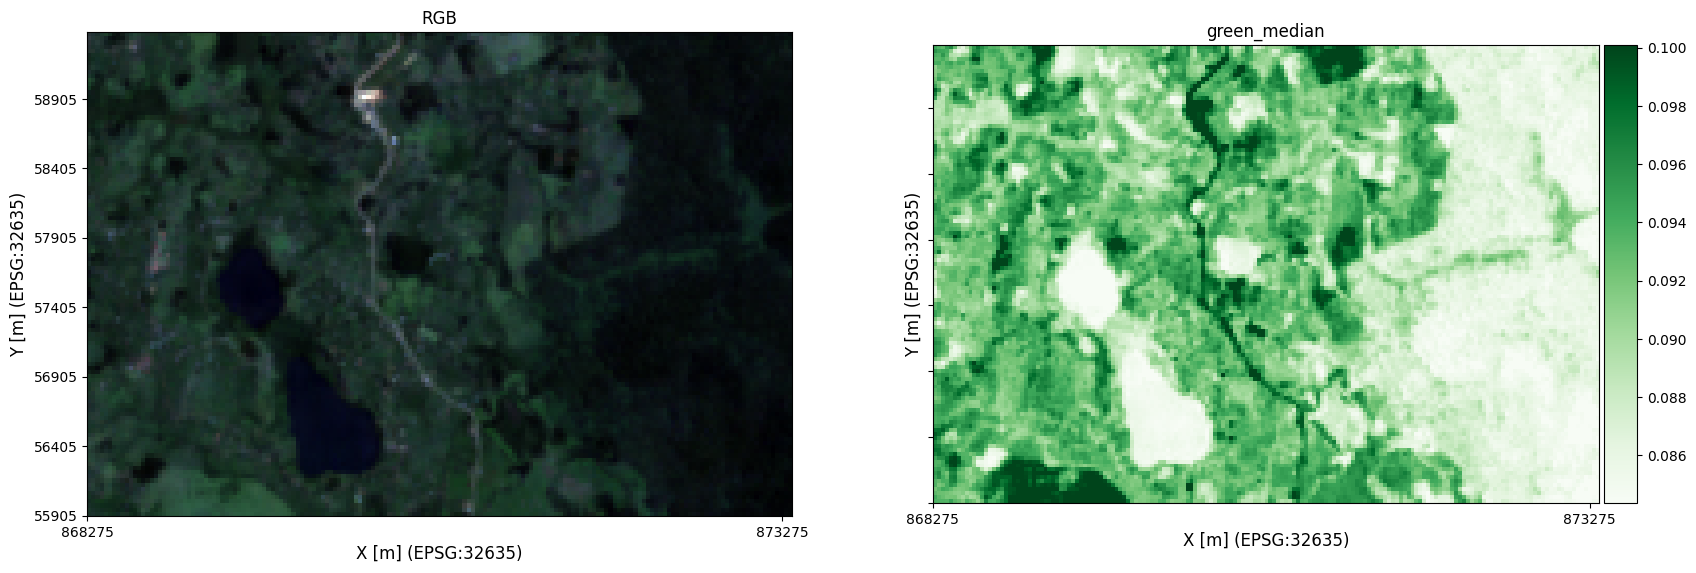

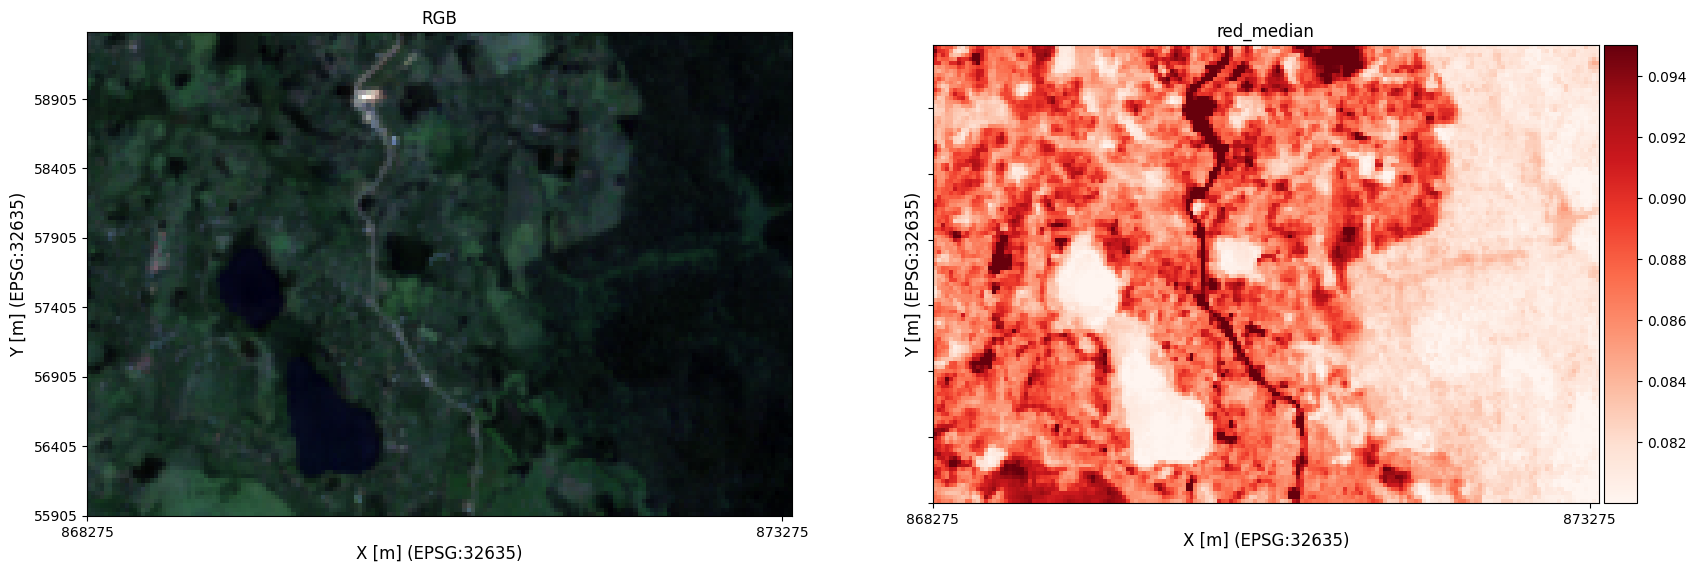

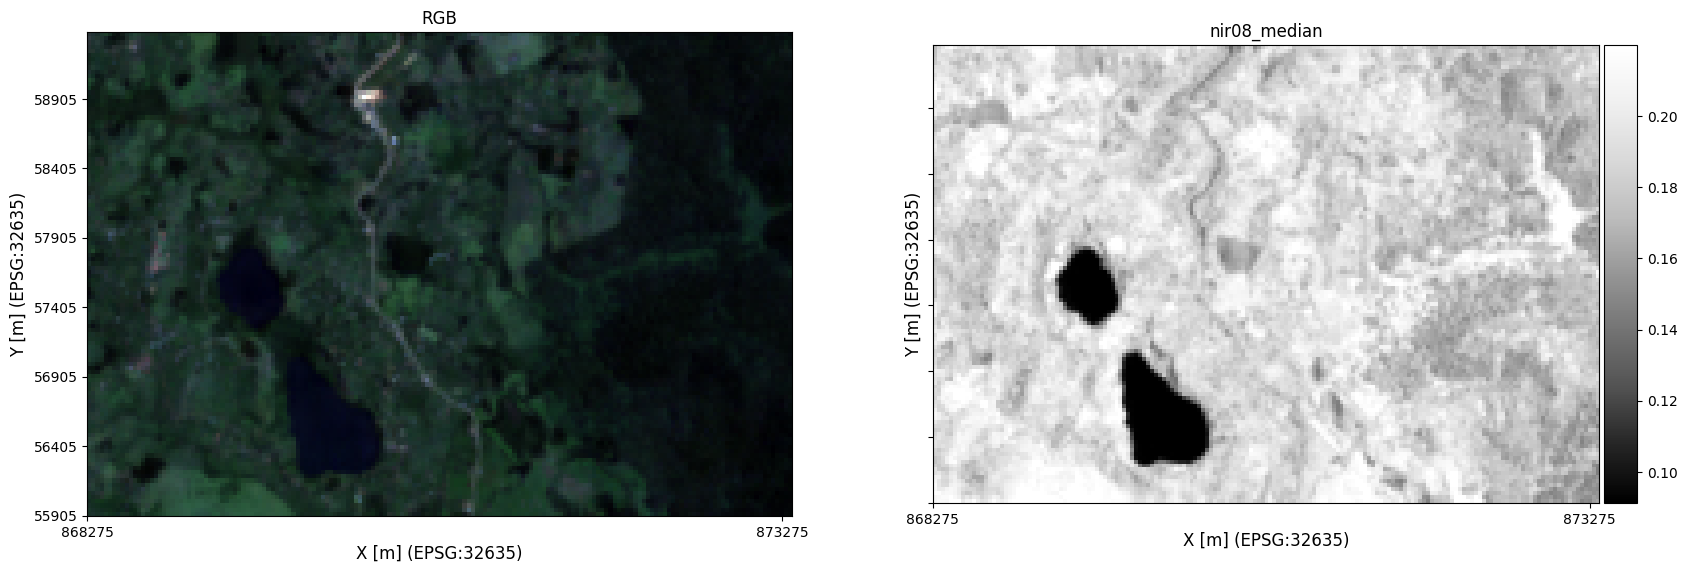

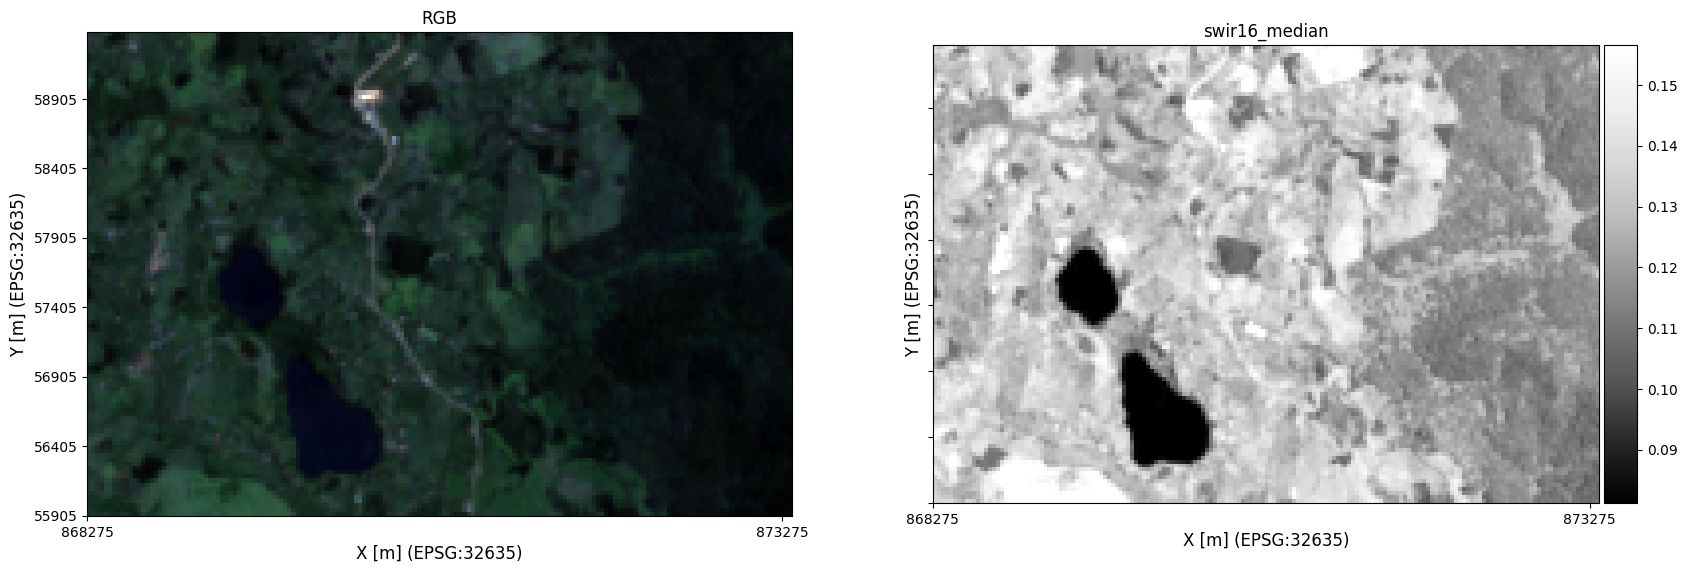

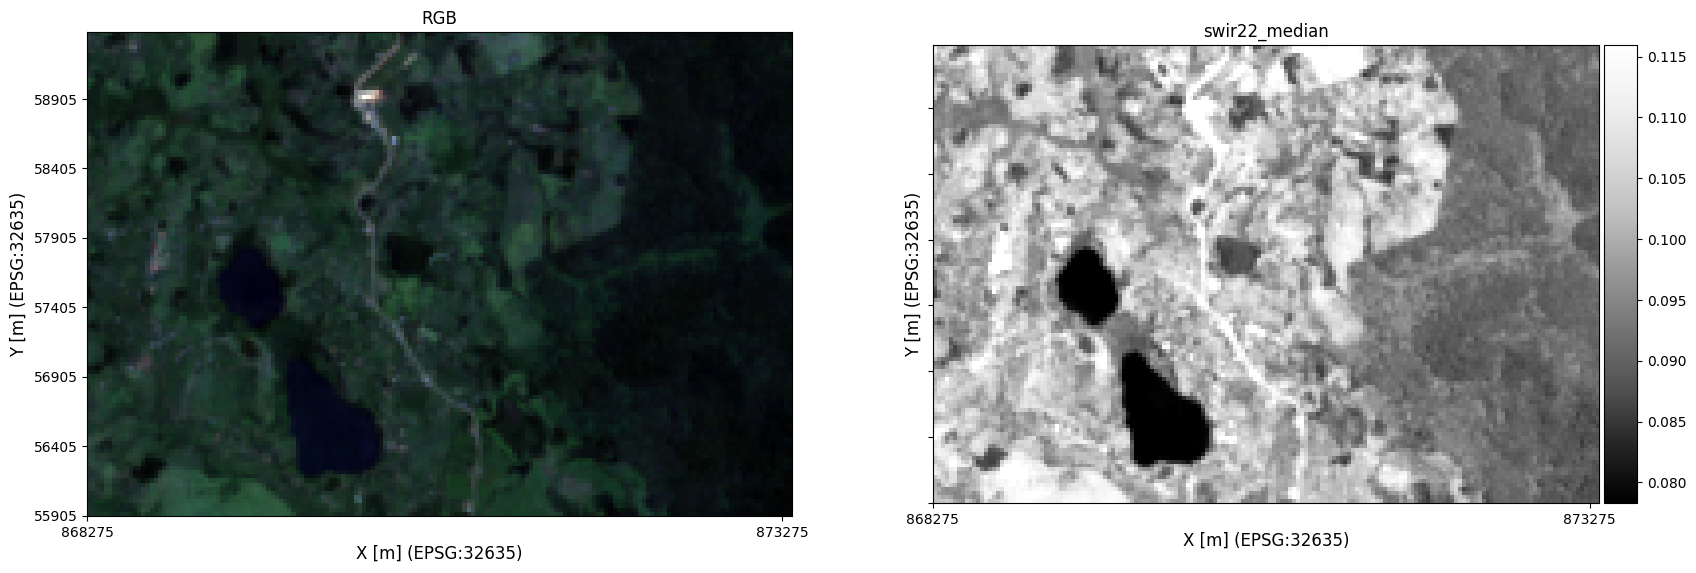

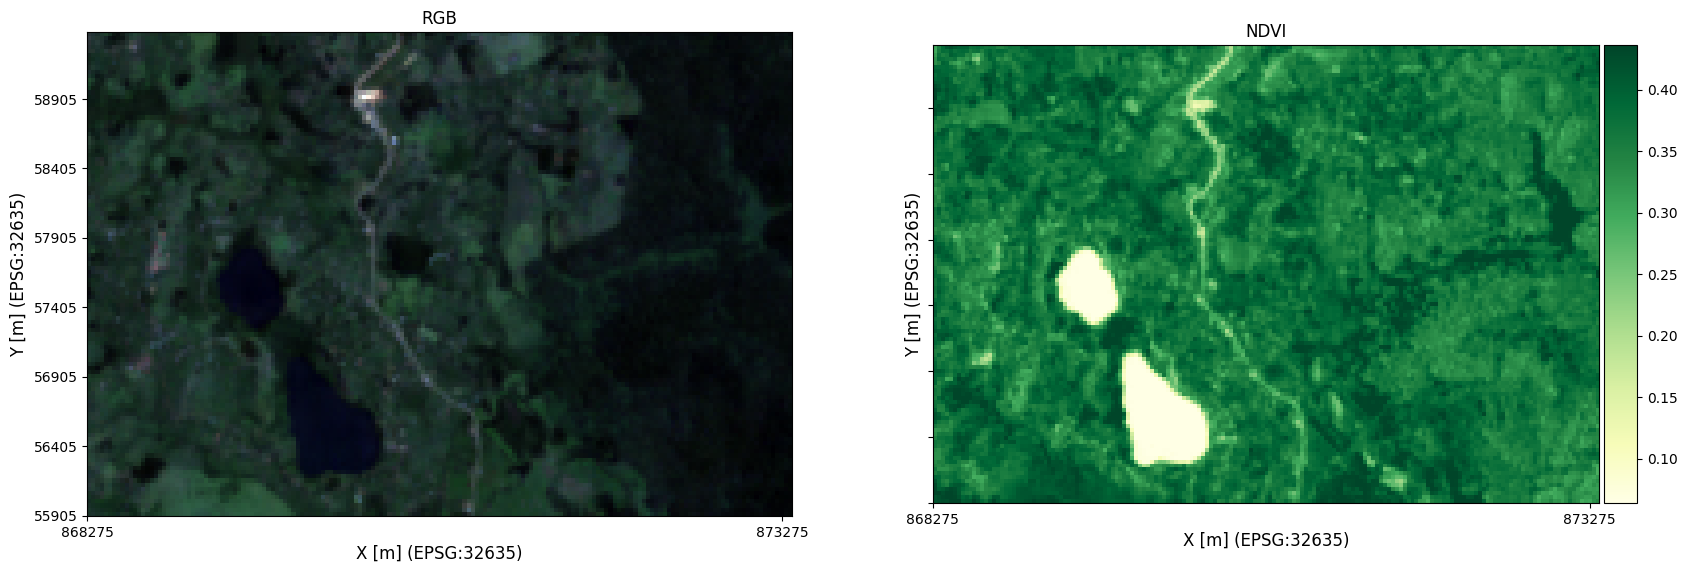

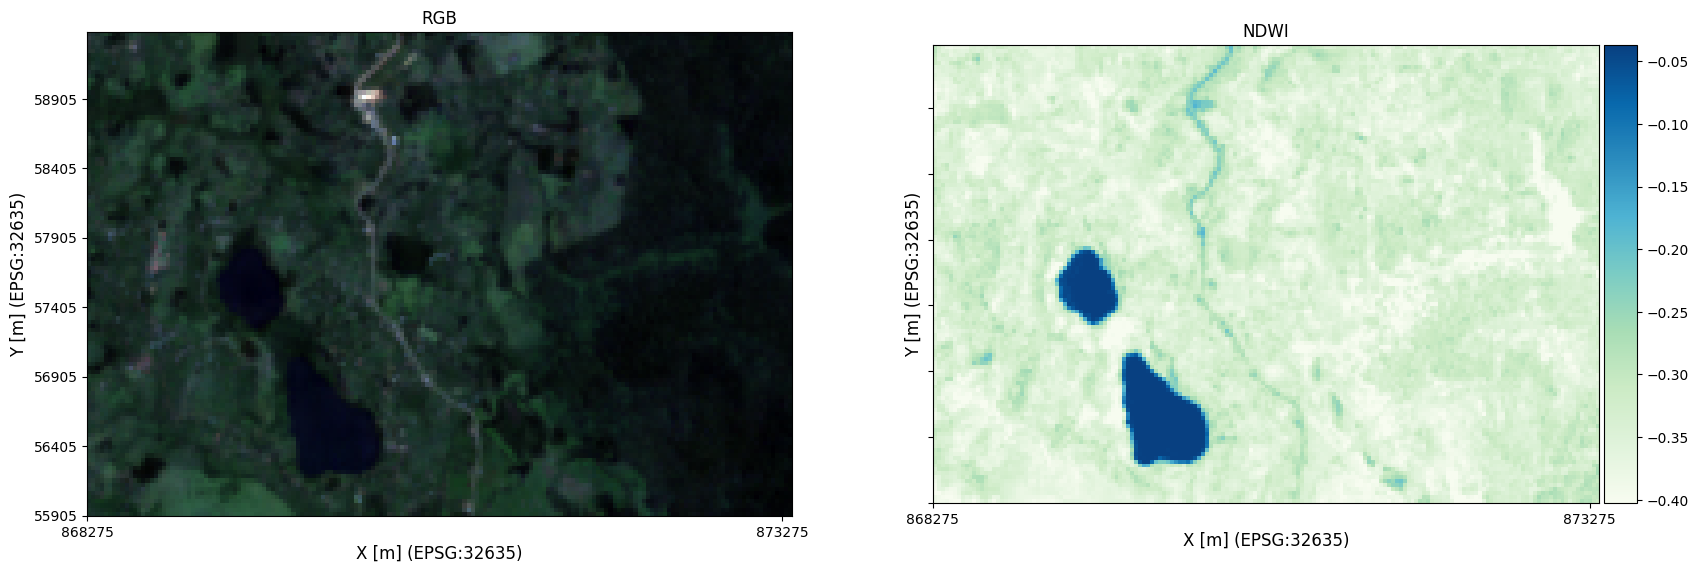

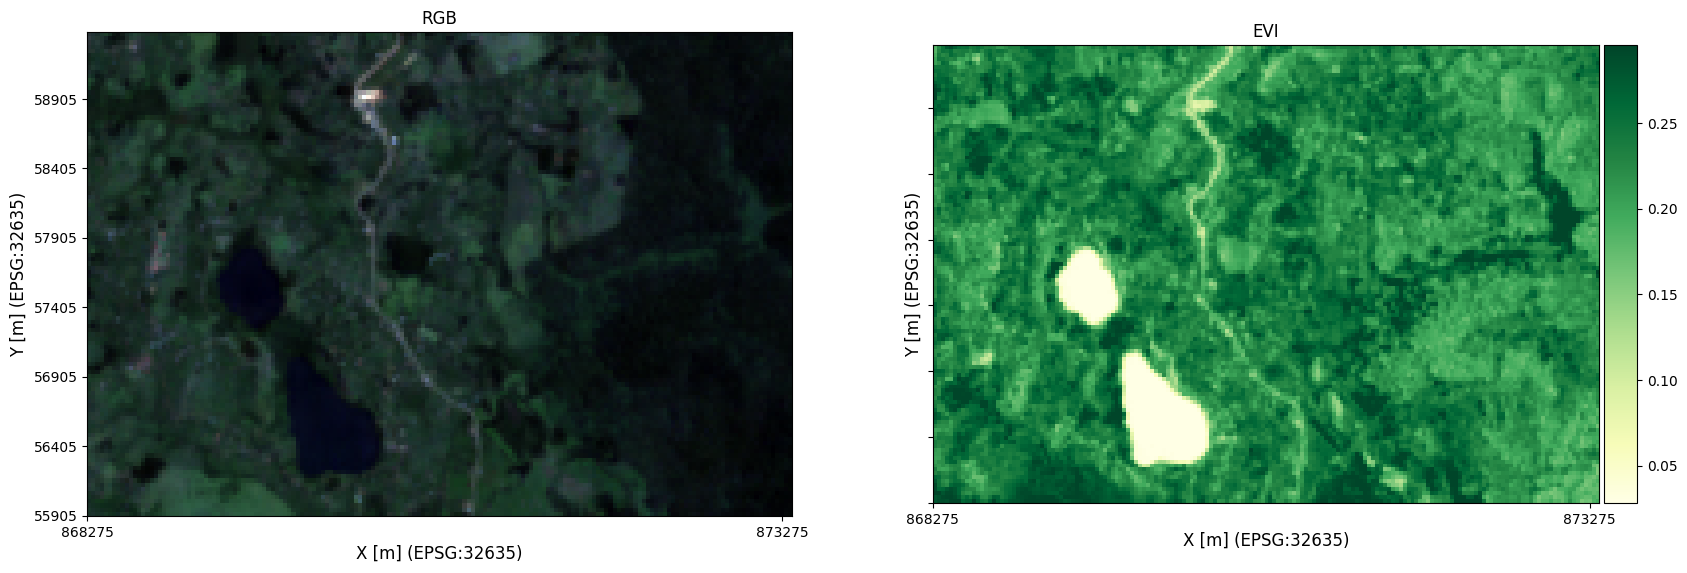

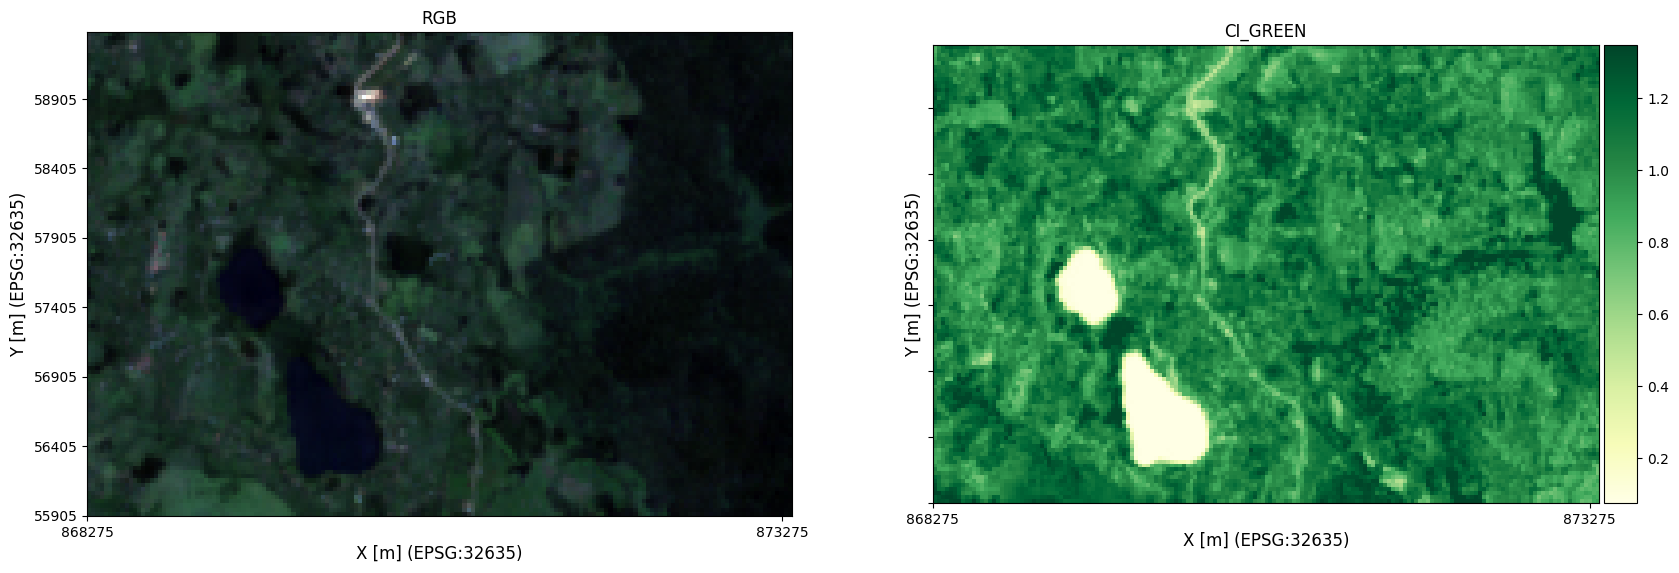

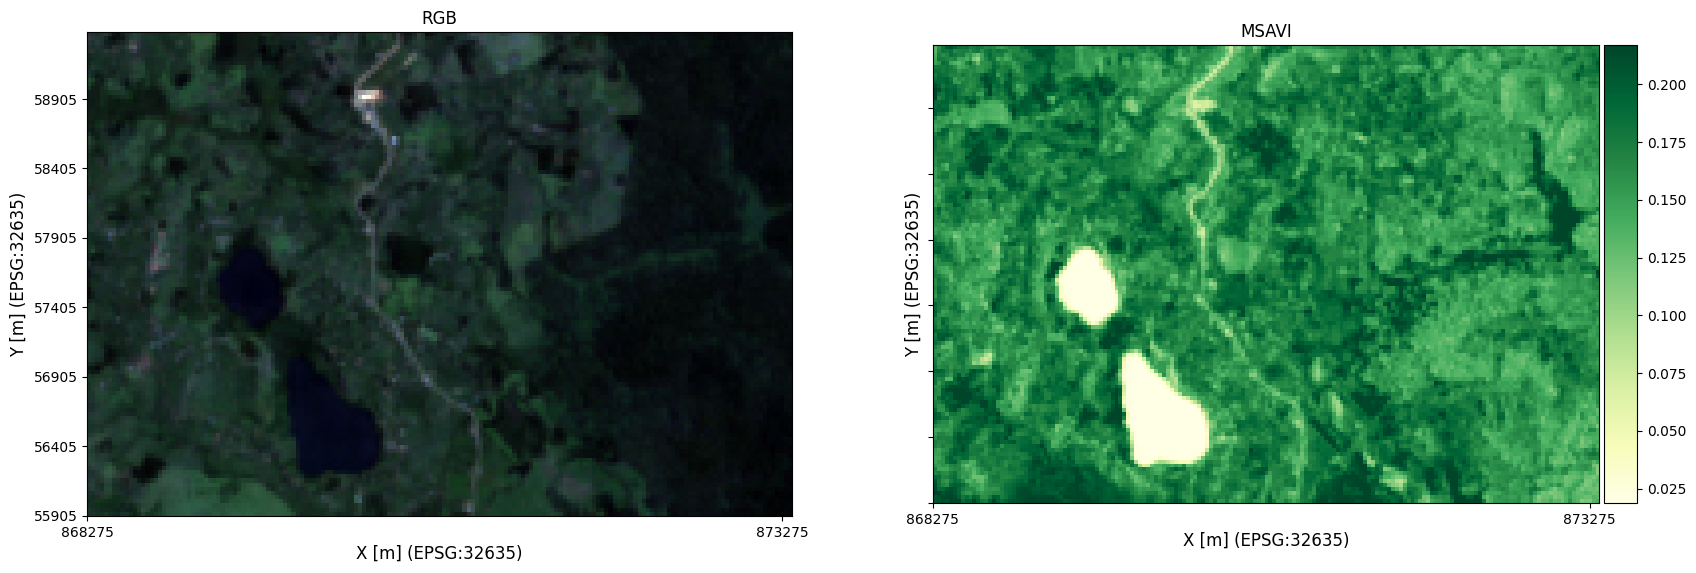

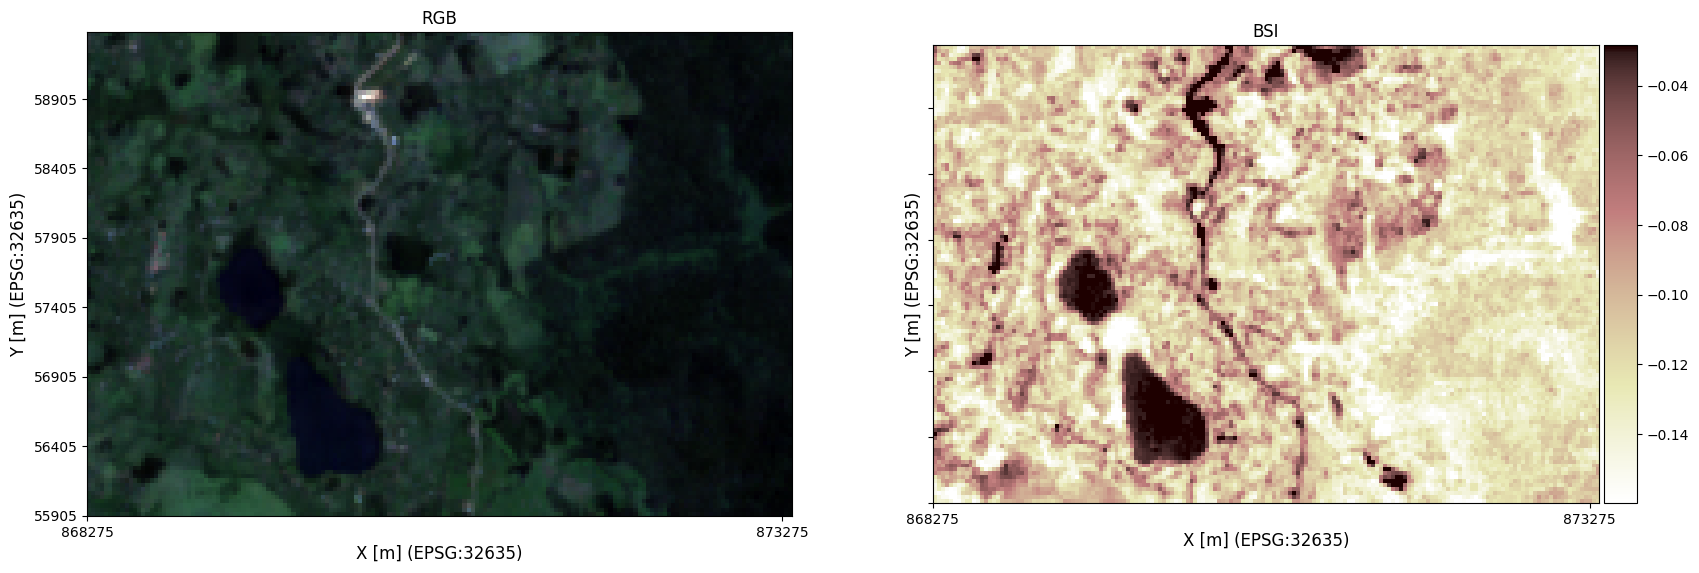

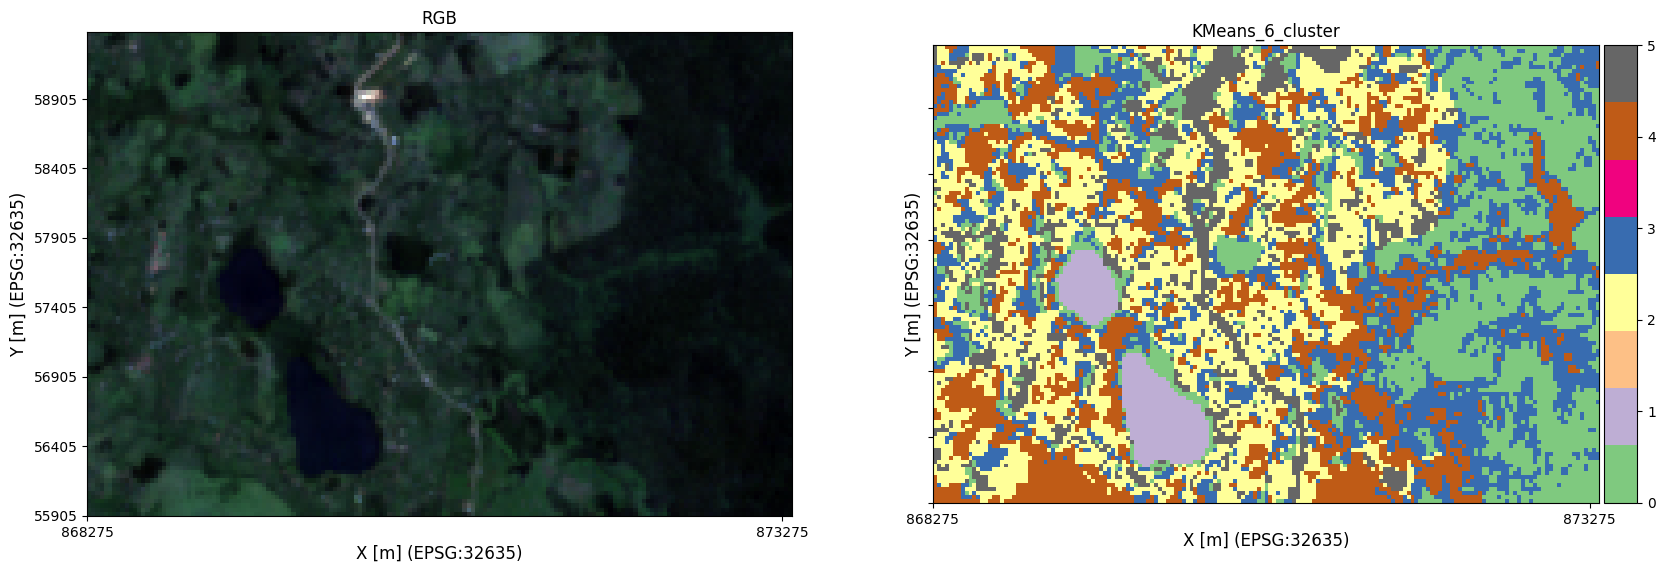

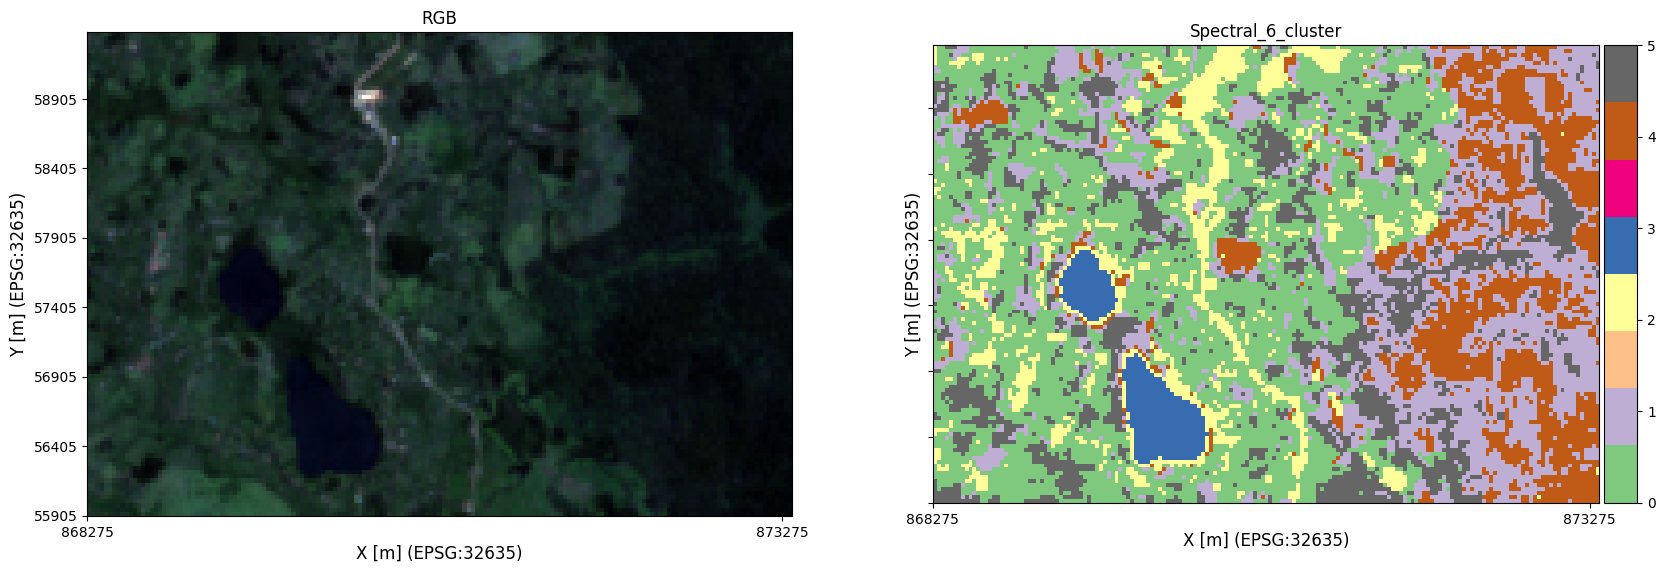

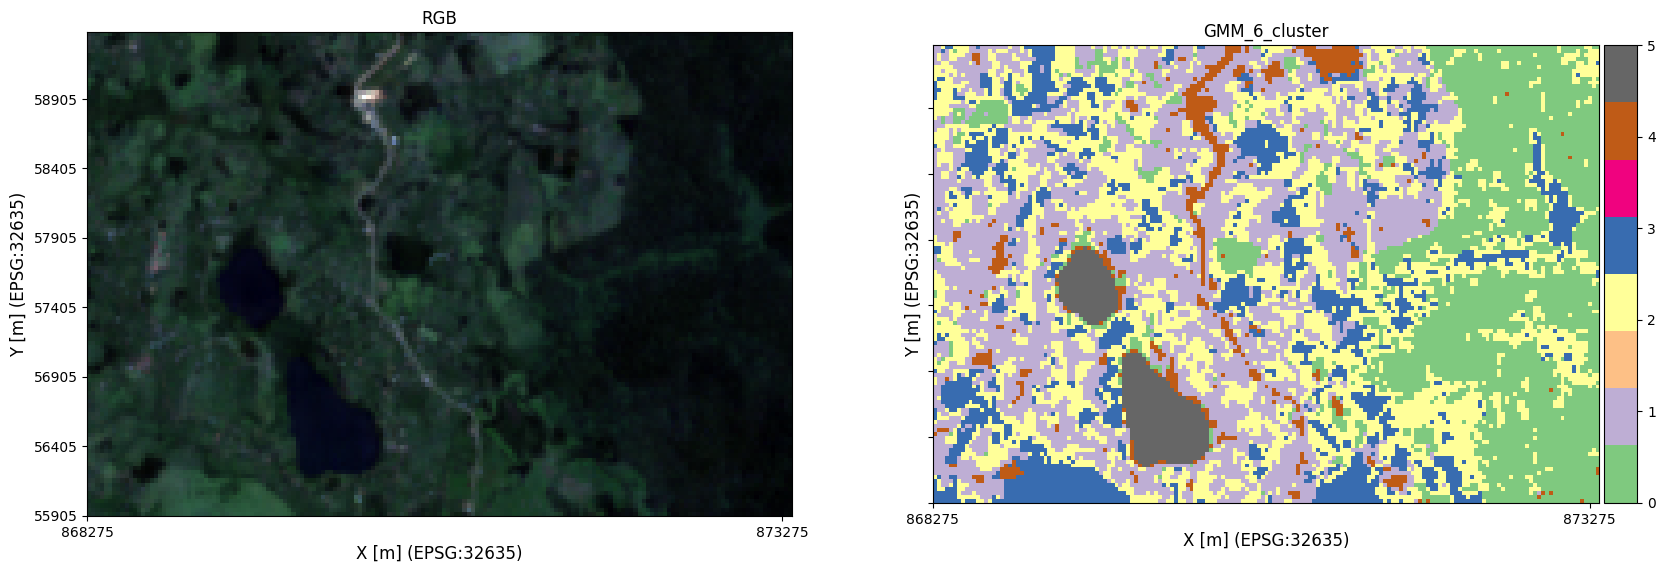

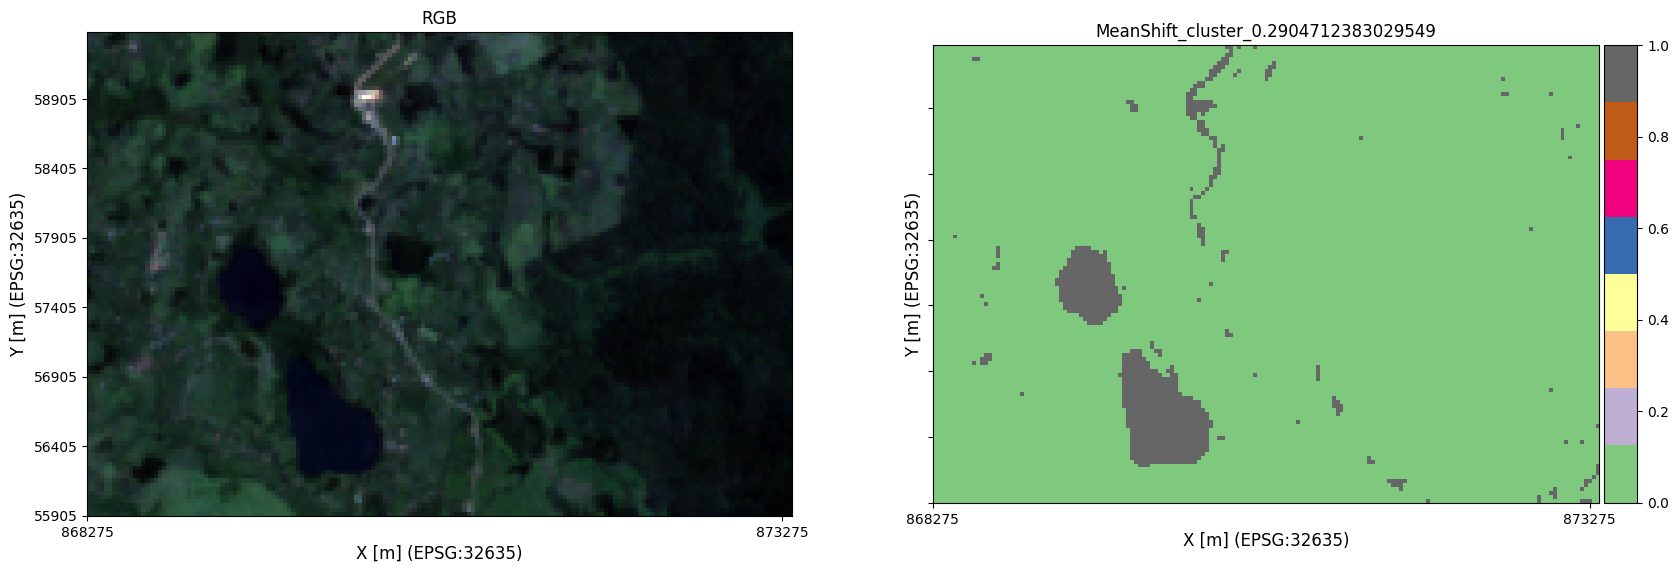

In [40]:
#plot band combinations
fig, axs = plt.subplots(1, 3, figsize = (20, 10), sharey=True)

composite.plot_multiple_bands(["nir08_median", "red_median", "green_median"], ax=axs[0])
axs[0].set_title("Color Infrared")
# This band combination is also called the near-infrared (NIR) composite. It uses near-infrared (5), red (4), and green (3). Because chlorophyll reflects near-infrared light, this band composition is useful for analyzing vegetation. In particular, areas in red have better vegetation health. Dark areas are water and urban areas are white.

composite.plot_multiple_bands(["swir16_median", "nir08_median", "blue_median"], ax=axs[1])
axs[1].set_title("Agriculture")
# This band combination uses SWIR-1 (6), near-infrared (5), and blue (2). It’s commonly used for crop monitoring because of the use of short-wave and near-infrared. Healthy vegetation appears dark green. But bare earth has a magenta hue.

composite.plot_multiple_bands(["swir22_median", "swir16_median", "red_median"], ax=axs[2])
axs[2].set_title("Short-Wave Infrared")
# The short-wave infrared band combination uses SWIR-2 (7), SWIR-1 (6), and red (4). This composite displays vegetation in shades of green. While darker shades of green indicate denser vegetation, sparse vegetation has lighter shades. Urban areas are blue and soils have various shades of brown.

#plot individual bands:
for band in composite.band_names:
    fig, axs = plt.subplots(1, 2, figsize = (20, 10), sharey=True)
    composite.plot_multiple_bands(["red_median", "green_median", "blue_median"], ax=axs[0])
    axs[0].set_title("RGB")
    if band == 'blue_median':
        composite.plot_band(band, colormap="Blues", ax=axs[1])
        axs[1].set_title(band)
    if band == 'green_median':
        composite.plot_band(band, colormap="Greens", ax=axs[1])
        axs[1].set_title(band)
    if band == 'red_median':
        composite.plot_band(band, colormap="Reds", ax=axs[1])
        axs[1].set_title(band)
    if band == 'nir08_median':
        composite.plot_band(band, colormap="Greys_r", ax=axs[1])
        axs[1].set_title(band)
    if band == 'swir16_median':
        composite.plot_band(band, colormap="Greys_r", ax=axs[1])
        axs[1].set_title(band)
    if band == 'swir22_median':
        composite.plot_band(band, colormap="Greys_r", ax=axs[1])
        axs[1].set_title(band)
    if band == 'NDVI':
        composite.plot_band(band, colormap="YlGn", ax=axs[1])
        axs[1].set_title(band)
    if band == 'NDWI':
        composite.plot_band(band, colormap="GnBu", ax=axs[1])
        axs[1].set_title(band)
    if band == 'EVI':
        composite.plot_band(band, colormap="YlGn", ax=axs[1])
        axs[1].set_title(band)
    if band == 'CI_GREEN':
        composite.plot_band(band, colormap="YlGn", ax=axs[1])
        axs[1].set_title(band)
    if band == 'MSAVI':
        composite.plot_band(band, colormap="YlGn", ax=axs[1])
        axs[1].set_title(band)
    if band == 'BSI':
        composite.plot_band(band, colormap="pink_r", ax=axs[1])
        axs[1].set_title(band)
    if band == 'KMeans_6_cluster':
        composite.plot_band(band, colormap="Accent", ax=axs[1])
        axs[1].set_title(band)
    if band == 'GMM_6_cluster':
        composite.plot_band(band, colormap="Accent", ax=axs[1])
        axs[1].set_title(band)
    if band == 'Spectral_6_cluster':
        composite.plot_band(band, colormap="Accent", ax=axs[1])
        axs[1].set_title(band)
    if band == 'MeanShift_cluster_0.2904712383029549':
        composite.plot_band(band, colormap="Accent", ax=axs[1])
        axs[1].set_title(band)